#### JupyterNotebook Gruppe A
# Haben der Anteil an Ausländer_innen und die Alterstruktur in den Dortmunder Bezirken einen Einfluss auf die Bundestagswahlergebnisse der AfD in den Jahren 2013 und 2017?

## Inhaltsverzeichnis
1. Einleitung und Forschungsfrage <br/>
2. Datenaufbereitung <br/>
2.1 Definitionen <br/>
2.2 Datensatz <br/>
2.3 Vorüberlegungen <br/>
3. Berechnungen
3.1 Hypothese 1a: Je höher der Anteil an Ausländer_innen in einem Stadtbezirk, desto weniger Bürger_innen wählen die AfD <br/>
3.2 Hypothese 1b: Wächst der Anteil an Ausländer_innen in den Bezirken von 2013 zu 2017, nehmen die Zweitstimmen der AfD ab <br>
3.3 Hypothese 2a: Je mehr Menschen im rentenfähigen Alter ab 65 Jahren in einem Bezirk leben, desto mehr Wahlstimmen verzeichnet die AfD <br>
3.4 Hypothese 2b: Wenn die Anzahl von Menschen im rentenfähigen Alter ab 65 Jahren in einem Bezirk zunimmt, verzeichnet die AfD mehr Zweitstimmen <br/>
3.5 Betrachtung weiterer Altersgruppen <br/>
4. Ergebnisse <br/>

## 1 Einleitung und Forschungsfrage

<b>FRAGE AN TOBIAS: Inhalte: Copy&Paste aus Bericht oder weglassen?</b>


Die Forschungsfrage wird im Folgenden beantwortet, indem wir die Zusammenhänge zwischen Ausländer_innenanteil, sowie Altersstruktur und der Anzahl an AfD-Zweitstimmen in den zwölf Stadtteilen Dortmunds untersuchen.

## 2 Datenaufbereitung

## 2.1 Definitionen

Als Ausländer_innen definiert sind Menschen ohne deutsche Staatsbürgerschaft. Unter dem Begriff Senior_innen werden Menschen, die im Rentenalter sind, verstanden.

## 2.2 Datensatz

Zuerst wird die Programmbibliothek Pandas importiert, um Datenanalysen durchführen zu können. Ebenso wird der Forschungsdatensatz (Version drei) importiert. Die Stichprobe, welche wir als Forschungsdatensatz verwenden enthält Daten aus den Jahren der letzten und vorletzten Bundestatgswahlen (2017, 2013).

In [1]:
#Programmbibliothek Pandas importieren
import pandas as pd
#Bibliothek zum Zeichnen von Grafen importieren
import matplotlib.pyplot as plt
#numpy Bibliothek importieren
import numpy as np

In [2]:
#vollständige Anzeige aller Spalten einstellen
pd.options.display.max_columns = None

#Forschungsdatensatz Version vier (alle Daten) importieren und anzeigen
dortmund = pd.read_csv('Forschungsdatensatz_v4.csv')
dortmund.head(n=12)

,Stadtbezirk,Deutsch2017,Ausländer2017,Deutsch2013,Ausländer2013,Wahlberechtigte2017,WählerInnen2017,UngültigeZweitstimmen2017,GültigeZweitstimmen2017,AfDZweitstimmen2017,Wahlberechtigte2013,WählerInnen2013,UngültigeZweitstimmen2013,GültigeZweitstimmen2013,AfDZweitstimmen2013,2017Alter0bis2,2017Alter3bis5,2017Alter6bis17,2017Alter18bis24,2017Alter25bis34,2017Alter35bis49,2017Alter50bis64,2017Alter65bis70,2017Alter80uÄ,2013Alter0bis2,2013Alter3bis5,2013Alter6bis17,2013Alter18bis24,2013Alter25bis34,2013Alter35bis49,2013Alter50bis64,2013Alter65bis79,2013Alter80uÄ
0,Innenstadt-West,43702,9621,44023,8008,22014,11796,208,11588,1148,23627,11860,194,11666,401,1356,1136,4172,5773,11713,10331,9927,6215,2700,1238,1102,4123,5729,10667,11095,9259,6294,2524
1,Innenstadt-Nord,29035,30444,31106,23886,41632,32291,204,32087,2318,41679,30478,273,30205,1205,2349,2193,8374,7692,11065,12450,8893,4941,1522,1940,1921,7187,7182,9926,12025,8336,5103,1372
2,Innenstadt-Ost,48147,8207,47682,6555,38056,28707,185,28522,2114,38272,27430,283,27147,985,1624,1297,4240,4234,10901,11702,10830,7907,3619,1348,1185,3959,4221,9905,11612,10450,8082,3475
3,Eving,29224,9103,29774,7006,23742,15858,197,15661,2169,24250,15386,203,15183,736,1140,1051,4393,3426,5274,7868,7829,5176,2170,902,1013,4492,3328,4546,8075,7279,5246,1899
4,Scharnhorst,38301,7574,39230,4993,31072,20677,281,20396,3053,32048,20034,260,19774,774,1436,1503,5946,3559,5232,8751,9756,6784,2908,1144,1258,5616,3486,4856,8913,9348,7099,2503
5,Brackel,50266,5828,50515,4013,42599,31348,301,31047,3469,42989,29531,311,29220,1225,1503,1498,5645,3891,6517,10658,13330,9064,3988,1196,1263,5540,3998,6004,11281,12346,9587,3313
6,Aplerbeck,51188,4117,51816,3140,43266,33486,200,33286,2945,43600,32173,253,31920,1289,1307,1353,5788,3591,5754,10736,13140,9353,4283,1232,1269,6070,3536,5538,11920,12156,9812,3423
7,Hörde,47967,7551,47502,5808,40607,30669,231,30438,2726,40187,28519,280,28239,1146,1504,1337,5596,4084,7132,11013,12302,8869,3681,1188,1268,5550,3850,6344,11497,11436,9113,3064
8,Hombruch,51367,5687,51836,4700,43870,35169,201,34968,2682,44076,33952,297,33655,1395,1295,1256,5407,5528,7255,10366,12523,9087,4337,1139,1231,5610,5179,7104,11500,11564,9319,3890
9,Lütgendortmund,42435,6267,43557,4551,35852,25013,214,24799,3098,36598,23570,225,23345,984,1265,1310,5108,4309,6582,9280,11314,6765,2769,1166,1185,5216,4259,6066,10330,10583,6791,2512


## 2.3 Vorüberlegungen zu Relationen und Verteilungen

Im Folgenden werden die Relationen und Verteilungen der Ausländer_innen, sowie der verschiedenen Altersgruppen (*Aufzählen??*) auf die Stadtteile in den jeweiligen Jahren betrachtet, um einen ersten Einblick in die Daten zu bekommen.

### 2.3.1 Ausländer_innen

Um einen ersten Überblick über die Einwohnerverteilung nach ethnischer Zugehörigkeit in den Stadtbezirken Dortmunds zu gewinnen, wird exemplarisch für das Jahr 2017 ein Balkendiagramm zu den absoluten Zahlen erstellt.



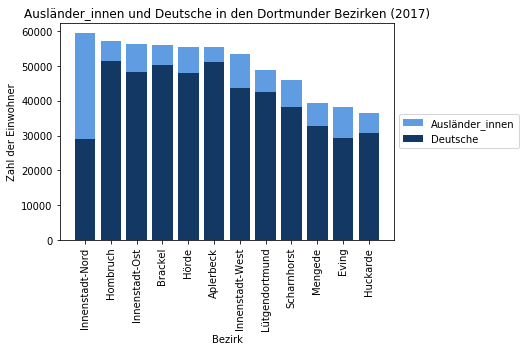

In [3]:
#Erstellen der Spalte Gesamteinwohnerzahl Dortmund 2017
dortmund['EinwohnerGesamt2017'] = dortmund['Ausländer2017'] + dortmund['Deutsch2017']

#die Variablen vorab zu definieren, ist nicht nötig, macht aber den Code unten etwas lesbarer
#Chart absteigend nach Zahl der Gesamteinwohner_innen in den Bezirken sortieren
deutsch2017 = dortmund.sort_values('EinwohnerGesamt2017',ascending=False)['Deutsch2017']
ausländer2017 = dortmund.sort_values('EinwohnerGesamt2017',ascending=False)['Ausländer2017']

#Serien für aufeinandergestapelte Balken und deren Farben vorbereiten
serie1 = plt.bar(range(len(dortmund)), deutsch2017, color='#133863')
serie2 = plt.bar(range(len(dortmund)), ausländer2017, bottom=deutsch2017, color='#609CE1')  
#Beschriftung der Säulen auf der X-Achse einstellen
plt.xticks(range(len(dortmund)), dortmund.sort_values('EinwohnerGesamt2017',ascending=False)['Stadtbezirk'],rotation=90) 
#Titel des Diagramms und Beschriftung der Achsen
plt.title('Ausländer_innen und Deutsche in den Dortmunder Bezirken (2017)') 
plt.xlabel('Bezirk') 
plt.ylabel('Zahl der Einwohner') 
#Fügt eine Legende rechts neben dem Diagramm hinzu.
plt.legend((serie2,serie1), ('Ausländer_innen','Deutsche'), loc='center left', bbox_to_anchor=(1, 0.5))
#Diagramm anzeigen
plt.show() 

Aus der grafischen Darstellung geht hervor, dass der Stadtbezirk mit den meisten Einwohnern (Innenstadt-Nord) zugleich die höchste Anzahl an Ausländer_innen aufweist. In diesem Stadtbezirk sind circa die Hälfte der Einwohner_innen Ausländer_innen. Dadurch setzt sich Innenstadt-Nord in der Verteilung von Ausländer_innen und Deutschen deutlich von den anderen Stadtbezirken ab.

Nachfolgend schauen wir uns die Entwicklung der relativen Zahlen an, um festzustellen, inwiefern sich die Verteilung von Ausländer_innen zwischen den Bundestagswahljahren 2013 und 2017 verändert hat.

In [4]:
#Erstellen der Spalte Gesamteinwohnerzahl Dortmund 2013
dortmund['EinwohnerGesamt2013'] = dortmund['Ausländer2013'] + dortmund['Deutsch2013']
#Erstellen der Spalte für die relative Anzahl der Ausländer_innen 2013
dortmund['RelAusländer2013'] = dortmund['Ausländer2013'] / dortmund['EinwohnerGesamt2013']
#Erstellen der Spalte für die relative Anzahl der Ausländer_innen 2013
dortmund['RelAusländer2017'] = dortmund['Ausländer2017'] / dortmund['EinwohnerGesamt2017']

#Differenz relativer Zahlen von Ausländer_innen zu 2013 und 2017 bilden
dortmund['DiffRelAusl1317'] = dortmund['RelAusländer2017'] - dortmund['RelAusländer2013']

#Dataframe aus den zuvor ermittelten Spalten + Ausgabe
RelAuslundDiff = dortmund[['Stadtbezirk', 'RelAusländer2013', 'RelAusländer2017', 'DiffRelAusl1317']]
RelAuslundDiff.head(n=12)
          

,Stadtbezirk,RelAusländer2013,RelAusländer2017,DiffRelAusl1317
0,Innenstadt-West,0.153908,0.180429,0.026520
1,Innenstadt-Nord,0.434354,0.511845,0.077490
2,Innenstadt-Ost,0.120858,0.145633,0.024775
3,Eving,0.190484,0.237509,0.047025
4,Scharnhorst,0.112905,0.165101,0.052196
5,Brackel,0.073595,0.103897,0.030302
6,Aplerbeck,0.057137,0.074442,0.017305
7,Hörde,0.108948,0.136010,0.027062
8,Hombruch,0.083133,0.099677,0.016545
9,Lütgendortmund,0.094600,0.128681,0.034081


In [5]:
#Arithmetisches Mittel errechnen und Ausgeben
print('Zwischen den Jahren 2013 und 2017 ist ein Anstieg an Ausländer_innen von durchschnittlich ' + str(round(dortmund['DiffRelAusl1317'].mean()*100,2)) + ' Prozent sichtbar.')


Zwischen den Jahren 2013 und 2017 ist ein Anstieg an Ausländer_innen von durchschnittlich 3.61 Prozent sichtbar.


An den obenstehenden Ergebnissen sehen wir, dass in allen Bezirken der Anteil an Ausländer_innen von 2013 zu 2017 zugenommen hat. Der Anstieg beläuft sich im Rahmen von rund zwei bis acht Prozent. Der Stadtbezirk Innenstadt-Nord weist hierbei eine nennenswert höhere Zunahme auf.

### 2.3.2 AfD-Wähler_innen

Auch hier wird eine Übersicht über die relative Verteilung von AfD-Zweitstimmen in den Stadtbezirken Dortmunds erstellt. 


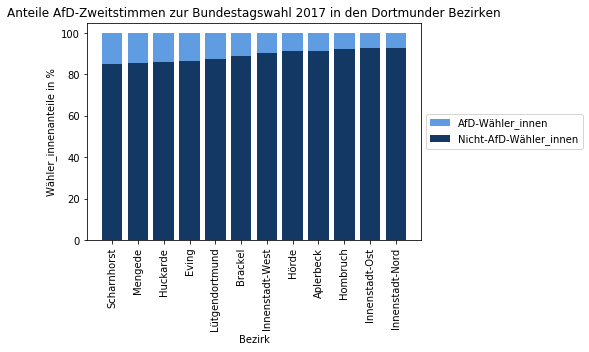

In [6]:
#Spalte für nicht-Afd-Zweitstimmen anlegen
dortmund['nichtAfDZweitstimmen2017'] = dortmund['WählerInnen2017'] - dortmund['AfDZweitstimmen2017']

#Erstellen der Spalte der realtiven Anzahl AfD Wähler_innen 2013
dortmund['RelZweitstimmenAfD2013'] = dortmund['AfDZweitstimmen2013'] / dortmund['WählerInnen2013']
#Erstellen der Spalte der realtiven Anzahl AfD Wähler_innen 2017
dortmund['RelZweitstimmenAfD2017'] = dortmund['AfDZweitstimmen2017'] / dortmund['WählerInnen2017']
#Erstellen der Spalte der realtiven Anzahl AfD nicht-Wähler_innen 2017
dortmund['RelnichtAfDZweitstimmen2017'] = dortmund['nichtAfDZweitstimmen2017'] / dortmund['WählerInnen2017']


#die Variablen vorab zu definieren, ist nicht nötig, macht aber den Code unten etwas lesbarer
#Chart absteigend nach Zahl der relativen AfD-Zweitstimmen in den Bezirken sortieren
nichtAfDWähler2017 = dortmund.sort_values('RelZweitstimmenAfD2017',ascending=False)['RelnichtAfDZweitstimmen2017']*100
AfDWähler2017 = dortmund.sort_values('RelZweitstimmenAfD2017',ascending=False)['RelZweitstimmenAfD2017']*100

#Serien für aufeinandergestapelte Balken und deren Farben vorbereiten
serie1 = plt.bar(range(len(dortmund)), nichtAfDWähler2017, color='#133863')
serie2 = plt.bar(range(len(dortmund)), AfDWähler2017, bottom=nichtAfDWähler2017, color='#609CE1')  
#Beschriftung der Säulen auf der X-Achse einstellen
plt.xticks(range(len(dortmund)), dortmund.sort_values('RelZweitstimmenAfD2017',ascending=False)['Stadtbezirk'],rotation=90) 
#Titel des Diagramms und Beschriftung der Achsen
plt.title('Anteile AfD-Zweitstimmen zur Bundestagswahl 2017 in den Dortmunder Bezirken') 
plt.xlabel('Bezirk') 
plt.ylabel('Wähler_innenanteile in %') 
#Fügt eine Legende rechts neben dem Diagramm hinzu
plt.legend((serie2,serie1), ('AfD-Wähler_innen','Nicht-AfD-Wähler_innen'), loc='center left', bbox_to_anchor=(1, 0.5))
#Diagramm anzeigen
plt.show() 

Aus dem Balkendiagramm zu der relativen Verteilung von AfD-Wähler_innen in den Dortmunder Stadtbezirken wird deutlich, dass Scharnhorst den höchsten und Innenstadt-Nord den geringsten Anteil an AfD-Wähler_innen verzeichnet. 

Um festzustellen, inwiefern sich die Verteilung von AfD-Wähler_innen zwischen den Bundestagswahljahren 2013 und 2017 verändert hat, schauen wir uns im Folgenden die Entwicklung der relativen Zahlen an.

In [7]:
#Differenz relativer Zahlen von AfD-Wähler_innen zu 2013 und 2017 bilden
dortmund['DiffRelZweitstimmenAfD1317'] = dortmund['RelZweitstimmenAfD2017'] - dortmund['RelZweitstimmenAfD2013']

#Dataframe aus den zuvor ermittelten Spalten + Ausgabe
RelAfDWählundDiff = dortmund[['Stadtbezirk', 'RelZweitstimmenAfD2013', 'RelZweitstimmenAfD2017', 'DiffRelZweitstimmenAfD1317']]
RelAfDWählundDiff.head(n=12)                                                                                           
                                                                                            

,Stadtbezirk,RelZweitstimmenAfD2013,RelZweitstimmenAfD2017,DiffRelZweitstimmenAfD1317
0,Innenstadt-West,0.033811,0.097321,0.063510
1,Innenstadt-Nord,0.039537,0.071785,0.032248
2,Innenstadt-Ost,0.035910,0.073641,0.037731
3,Eving,0.047836,0.136776,0.088941
4,Scharnhorst,0.038634,0.147652,0.109018
5,Brackel,0.041482,0.110661,0.069179
6,Aplerbeck,0.040065,0.087947,0.047883
7,Hörde,0.040184,0.088885,0.048701
8,Hombruch,0.041087,0.076260,0.035173
9,Lütgendortmund,0.041748,0.123856,0.082108


In [8]:
#Arithmetisches Mittel errechnen und Ausgeben
print('Zwischen den Jahren 2013 und 2017 ist ein Anstieg an AfD-Wähler_innen von durchschnittlich ' + str(round(dortmund['DiffRelZweitstimmenAfD1317'].mean()*100,2)) + ' Prozent sichtbar.')
 

Zwischen den Jahren 2013 und 2017 ist ein Anstieg an AfD-Wähler_innen von durchschnittlich 6.76 Prozent sichtbar.


An den obenstehenden Ergebnissen sehen wir, dass der Anteil an AfD-Wähler_innen von 2013 zu 2017 ohne Ausnahme in allen Stadtbezirken zugenommen hat. Der Anstieg beläuft sich im Rahmen von rund drei bis elf Prozent.

### 2.3.3 Altersgruppen

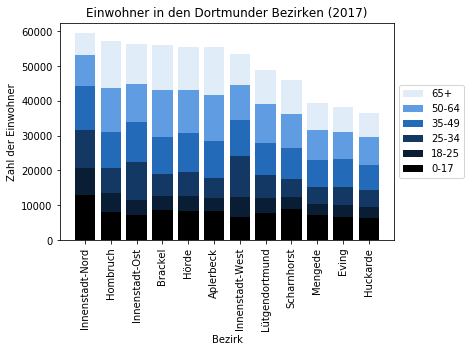

In [9]:
#Berechnen der Anzahl von Menschen unter 18 Jahre in der Gesamtbevölkerung 2017 in neuer Spalte
dortmund ['2017MenschenBis17'] = dortmund ['2017Alter0bis2'] + dortmund['2017Alter3bis5'] + dortmund['2017Alter6bis17']
#Berechnen der Anzahl von Menschen über 65 Jahre in der Gesamtbevölkerung 2017 in neuer Spalte
dortmund ['2017MenschenAb65'] = dortmund ['2017Alter65bis70'] + dortmund['2017Alter80uÄ']

#die Variablen vorab zu definieren, ist nicht nötig, macht aber den Code unten etwas lesbarer
#Chart absteigend nach Zahl der Gesamteinwohner_innen in den Bezirken sortieren
alterbis17 = dortmund.sort_values('EinwohnerGesamt2017',ascending=False)['2017MenschenBis17']
alter18bis24 = dortmund.sort_values('EinwohnerGesamt2017',ascending=False)['2017Alter18bis24']
alter25bis34 = dortmund.sort_values('EinwohnerGesamt2017',ascending=False)['2017Alter25bis34']
alter35bis49 = dortmund.sort_values('EinwohnerGesamt2017',ascending=False)['2017Alter35bis49']
alter50bis64 = dortmund.sort_values('EinwohnerGesamt2017',ascending=False)['2017Alter50bis64']
alter65plus = dortmund.sort_values('EinwohnerGesamt2017',ascending=False)['2017MenschenAb65']

#Serien für aufeinandergestapelte Balken und deren Farben vorbereiten
serie0 = plt.bar(range(len(dortmund)), alterbis17, color='black')
serie1 = plt.bar(range(len(dortmund)), alter18bis24, bottom=alterbis17, color='#091D34') 
serie2 = plt.bar(range(len(dortmund)), alter25bis34, bottom=alterbis17+alter18bis24, color='#133863') #legt den Balken für "mittlere" auf den Balken für "junge"
serie3 = plt.bar(range(len(dortmund)), alter35bis49, bottom=alterbis17+alter18bis24+alter25bis34, color='#236AB9') 
serie4 = plt.bar(range(len(dortmund)), alter50bis64, bottom=alterbis17+alter18bis24+alter25bis34+alter35bis49, color='#609CE1') 
serie5 = plt.bar(range(len(dortmund)), alter65plus, bottom=alterbis17+alter18bis24+alter25bis34+alter35bis49+alter50bis64, color='#E1ECF9') 
#Beschriftung der Säulen auf der X-Achse einstellen
plt.xticks(range(len(dortmund)), dortmund.sort_values('EinwohnerGesamt2017',ascending=False)['Stadtbezirk'],rotation=90) 
#Titel des Diagramms und Beschriftung der Achsen
plt.title('Einwohner in den Dortmunder Bezirken (2017)') 
plt.xlabel('Bezirk') 
plt.ylabel('Zahl der Einwohner') 
#Fügt eine Legende rechts neben dem Diagramm hinzu
plt.legend((serie5,serie4,serie3,serie2,serie1,serie0), ('65+','50-64','35-49','25-34','18-25','0-17'), loc='center left', bbox_to_anchor=(1, 0.5)) #Fügt eine Legende hinzu.
#Diagramm anzeigen
plt.show() 

<b>HIER FEHLT NOCH EIN SATZ</b>

# 3 Berechnungen

## 3.1 Hypothese 1a: Je höher der Anteil an Ausländer_innen in einem Stadtbezirk, desto weniger Bürger_innen wählen die AfD

Statistische Hypothese 1a: Es besteht eine negative Korrelation (r) zwischen der relativen Anzahl an Ausländer_innen in einem Bezirk und der relativen Zahl der Zweitstimmen für die AfD

### 3.1.1 Datenbetrachtung Bundestagswahl 2013

In [10]:
#Berechnen der "relativen" Korrelation Ausländer_innenanteil zu AfD-Wähler_innenzahlen 2013
RelKorrelationAusländerWähler2013 = dortmund['RelAusländer2013'].corr(dortmund['RelZweitstimmenAfD2013'])
print(RelKorrelationAusländerWähler2013)

-0.02812858048218001


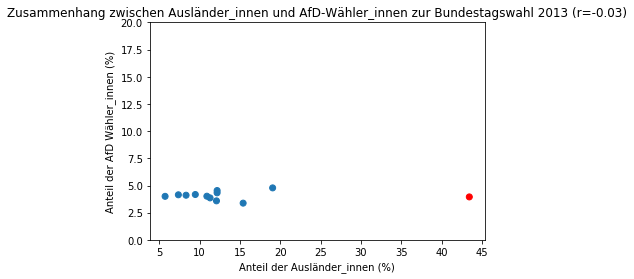

In [11]:
#Variablen zur Übersichtlichkeit definieren + Umrechnung in Prozent
x=dortmund['RelAusländer2013'] *100
y=dortmund['RelZweitstimmenAfD2013']*100 
# Für die farbliche Markierung des Ausreißers
col = np.where(x<40,'C0','r')
#Alternativ mit drei Farbfeldern:
#col = np.where(x<40,'k',np.where(y>4,'b','r'))
#Punktdiagramm anlegen
plt.scatter(x, y, c=col) 
#Titel des Diagramms und Beschriftung der Achsen
plt.xlabel('Anteil der Ausländer_innen (%)')
plt.ylabel('Anteil der AfD Wähler_innen (%)')
plt.title('Zusammenhang zwischen Ausländer_innen und AfD-Wähler_innen zur Bundestagswahl 2013 (r=-0.03)')
#Skalierung der y-Achse definieren
plt.ylim(bottom=0, top=20)
#Diagramm anzeigen
plt.show()

In [12]:
#Identifizieren des Ausreißers mittels Dataframe
dortmundAuslAfD2013 = dortmund [['Stadtbezirk', 'RelAusländer2013', 'RelZweitstimmenAfD2013']]
#Anzeige aktualisierter Datensatz
dortmundAuslAfD2013.head(n=12)


,Stadtbezirk,RelAusländer2013,RelZweitstimmenAfD2013
0,Innenstadt-West,0.153908,0.033811
1,Innenstadt-Nord,0.434354,0.039537
2,Innenstadt-Ost,0.120858,0.035910
3,Eving,0.190484,0.047836
4,Scharnhorst,0.112905,0.038634
5,Brackel,0.073595,0.041482
6,Aplerbeck,0.057137,0.040065
7,Hörde,0.108948,0.040184
8,Hombruch,0.083133,0.041087
9,Lütgendortmund,0.094600,0.041748


Ein Korrelationskoeffizient von rund -0,03 zeigt, dass zwischen den Variablen Ausländer_innenanzahl 2013 und Anzahl der AfD-Zweitstimmen 2013 kein signifikanter Zusammenhang besteht. Die Hypothese 1a wurde somit auf Grundage der Daten für das Jahr 2013 nicht bestätigt. Es wurde ein Ausreißer identifiziert, der Stadtbezirk Innenstadt-Nord. Er zeichnet sich, wie aus den Vorüberlegungen hervor geht, durch einen wesentlich höheren Ausländer_innenanteil aus und setzt sich somit stark von den anderen Bezirken ab.  

<b>FRAGE AN TOBIAS: Skalierung (im Chart) sinnvoll gewählt?</b><br>
<b>FRAGE AN TOBIAS: Korrelation ohne "Ausreißer" sinnvoll? Wenn ja, warum?</b>

In [13]:
# Zeile Innenstadt Nord (IN) aus Dataframe entfernen, um r ohne Ausreißer zu betrachten:
dortmund['RelAusländer2013ohneIN'] = dortmund['RelAusländer2013'].drop([1], axis=0)
dortmund['RelZweitstimmenAfD2013ohneIN'] = dortmund['RelZweitstimmenAfD2013'].drop([1], axis=0)
RelKorrelationAusländerWähler2013ohneIN = dortmund['RelAusländer2013ohneIN'].corr(dortmund['RelZweitstimmenAfD2013ohneIN'])
print(RelKorrelationAusländerWähler2013ohneIN)


0.18578075812779019


### 3.1.2 Datenbetrachtung Bundestagswahl 2017

In [14]:
#Berechnen der Korrelation Ausländer_innenanteil zu AfD-Wähler_innenzahlen 2017
RelKorrelationAusländerWähler2017 = dortmund['RelAusländer2017'].corr(dortmund['RelZweitstimmenAfD2017'])
print(RelKorrelationAusländerWähler2017)

-0.17603512255275808


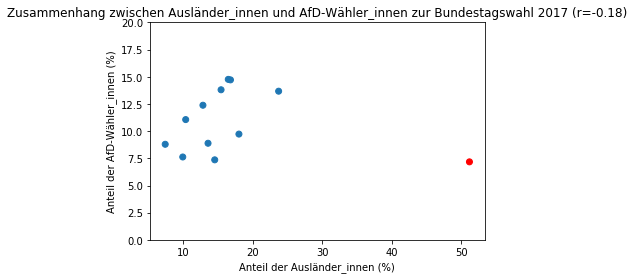

In [15]:
# Für die farbliche Markierung des Ausreißers
col = np.where(dortmund['RelAusländer2017']*100<50,'C0','r')
#Punktdiagramm anlegen
plt.scatter(dortmund['RelAusländer2017']*100, dortmund['RelZweitstimmenAfD2017']*100, c=col) #Umrechnung in Prozent
#Titel des Diagramms und Beschriftung der Achsen
plt.xlabel('Anteil der Ausländer_innen (%)')
plt.ylabel('Anteil der AfD-Wähler_innen (%)')
plt.title('Zusammenhang zwischen Ausländer_innen und AfD-Wähler_innen zur Bundestagswahl 2017 (r=-0.18)')
#Skalierung der y-Achse definieren
plt.ylim(bottom=0, top=20)
#Diagramm anzeigen
plt.show()

Der Korrelationskoeffizient von rund -0,18 zeigt, dass zwischen den Variablen Ausländer_innenanzahl 2017 und Anzahl der AfD-Zweitstimmen 2017 kein Zusammenhang erkennbar ist.


# 3.2 Hypothese 1b: Wächst der Anteil an Ausländer_innen in den Bezirken von 2013 zu 2017, nehmen die Zweitstimmen der AfD ab

Statistische Hypothese 1b: Es besteht eine negative Korrelation (r) zwischen dem Anstieg des Ausländer_innenanteils und dem Anstieg der AfD-Zweitstimmen

In [16]:
#Berechnen der Differenz des relativen Ausländer_innenanteils der Jahre 2013 und 2017
dortmund['EntwAusländer1317'] = (dortmund['RelAusländer2017']) - (dortmund['RelAusländer2013'])
#Berechnen der Differenz des relativen AfD-Zweitstimmenanteils der Jahre 2013 und 2017
dortmund['EntwWahlAfD1317'] = (dortmund['RelZweitstimmenAfD2017']) - (dortmund['RelZweitstimmenAfD2013'])

#Berechnen der Korrelation: Entwicklung Ausländer_innenanteil zu Entwicklung AfD-Zweitstimmen von 2013 zu 2017
KorrelationEntwAuslAfD = dortmund['EntwAusländer1317'].corr(dortmund['EntwWahlAfD1317'])
print(KorrelationEntwAuslAfD)

0.23612772398165877


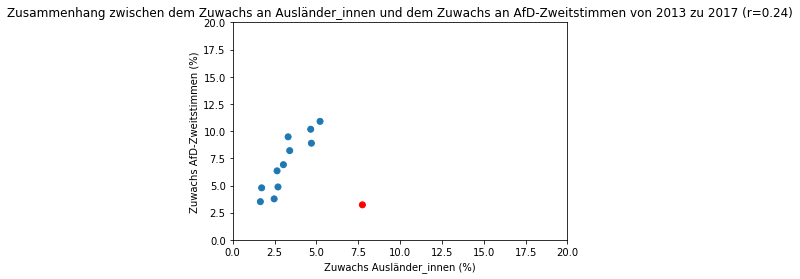

In [17]:
# Für die farbliche Markierung des Ausreißers
col = np.where(dortmund['EntwAusländer1317']*100<7,'C0','r')
#Punktdiagramm anlegen
plt.scatter(dortmund['EntwAusländer1317']*100, dortmund['EntwWahlAfD1317']*100, c=col) #Umrechnung in Prozent
#Titel des Diagramms und Beschriftung der Achsen
plt.xlabel('Zuwachs Ausländer_innen (%)')
plt.ylabel('Zuwachs AfD-Zweitstimmen (%)')
plt.title('Zusammenhang zwischen dem Zuwachs an Ausländer_innen und dem Zuwachs an AfD-Zweitstimmen von 2013 zu 2017 (r=0.24)')
#Skalierung der y-Achse und x-Achse definieren
plt.ylim(bottom=0, top=20)
plt.xlim(0, 20)
#Diagramm anzeigen
plt.show()

Der Korrelationskoeffizient der Variablen Entwicklung des Ausländer_innenanteils zur Entwicklung der AfD-Zweitstimmen von 2013 zu 2017 beträgt rund 0,24. Daher besteht ein geringer Zusammenhang. Die positive Korrelation wiederlegt die Hypothese 1b, dass mit wachsender Anzahl an Ausländer_innen in einem Stadtbezirk die Zweitstimmenanzahl der AfD abnimmt. 

In [18]:
# Zeile Innenstadt Nord (IN) aus Dataframe entfernen, um r ohne Ausreißer zu betrachten:
dortmund['EntwAusländer1317ohneIN'] = dortmund['EntwAusländer1317'].drop([1], axis=0)
dortmund['EntwWahlAfD1317ohneIN'] = dortmund['EntwWahlAfD1317'].drop([1], axis=0)
KorrelationEntwAuslAfDohneIN = dortmund['EntwAusländer1317ohneIN'].corr(dortmund['EntwWahlAfD1317ohneIN'])
print(KorrelationEntwAuslAfDohneIN)

0.9049893484533246


# 3.3 Hypothese 2a: Je mehr Menschen im rentenfähigen Alter ab 65 Jahren in einem Bezirk leben, desto mehr Wahlstimmen verzeichnet die AfD

Statistische Hypothese 2a: Es besteht eine postive Korrelation (r) zwischen den relativen Zahlen der Einwohner_innen ab 65 Jahren und dem Ergebnis der relativen Anzahl AfD-Zweitstimmen

### 3.3.1 Datenbetrachtung Budestatgswahl 2013

In [19]:
#Berechnen der Anzahl von Menschen über 65 Jahre in der Gesamtbevölkerung 2013 in neuer Spalte
dortmund ['2013MenschenAb65'] = dortmund ['2013Alter65bis79'] + dortmund['2013Alter80uÄ']
#Berechnen der relativen Anzahl von Menschen über 65 Jahre in der Gesamtbevölkerung 2013 in neuer Spalte
dortmund['2013RelMenschenAb65'] = dortmund ['2013MenschenAb65'] / dortmund['EinwohnerGesamt2013']

#Berechnen der Korratation von rel. Anzahl Menschen über 65 Jahre in der Gesamtbevölkerung zu rel. AfD-Wähler_innenzahlen 2013
KorrelationRentnerWähler2013 = dortmund['2013RelMenschenAb65'].corr(dortmund['RelZweitstimmenAfD2013'])
print(KorrelationRentnerWähler2013)


0.06256708816270694


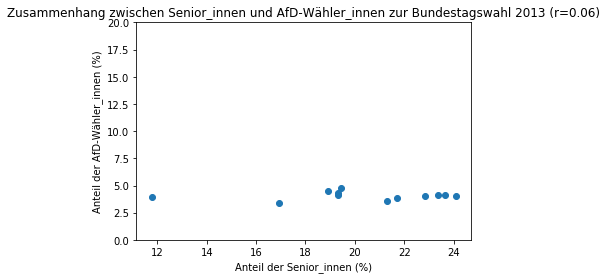

In [20]:
#Punktdiagramm anlegen
plt.scatter(dortmund['2013RelMenschenAb65']*100, dortmund['RelZweitstimmenAfD2013']*100) #Umrechnung in Prozent
#Titel des Diagramms und Beschriftung der Achsen
plt.xlabel('Anteil der Senior_innen (%)')
plt.ylabel('Anteil der AfD-Wähler_innen (%)')
plt.title('Zusammenhang zwischen Senior_innen und AfD-Wähler_innen zur Bundestagswahl 2013 (r=0.06)')
#Skalierung der y-Achse definieren
plt.ylim(bottom=0, top=20)
#Diagramm anzeigen
plt.show()

Der Korrelationskoeffizient von rund 0,06 deutet auf keinen Zusammenhang zwischen Relativer Anzahl an Renter_innen und der AfD Wahlquote hin. Die Hypothese 2a kann auf Grundlage der Daten des Jahres 2013 nicht bestätigt werden.

### 3.3.2 Datenbetrachtung Budestatgswahl 2017

In [21]:
#Berechnen der relativen Anzahl von Menschen über 65 Jahre in der Gesamtbevölkerung 2017 in neuer Spalte
dortmund['2017RelMenschenAb65'] = dortmund ['2017MenschenAb65'] / dortmund['EinwohnerGesamt2017']

#Berechnen der Korratation von rel. Anzahl Menschen über 65 Jahre in der Gesamtbevölkerung zu rel. AfD-Wähler_innenzahlen 2017
KorrelationRentnerWähler2017 = dortmund['2017RelMenschenAb65'].corr(dortmund['RelZweitstimmenAfD2017'])
print(KorrelationRentnerWähler2017)

0.05370049810090324


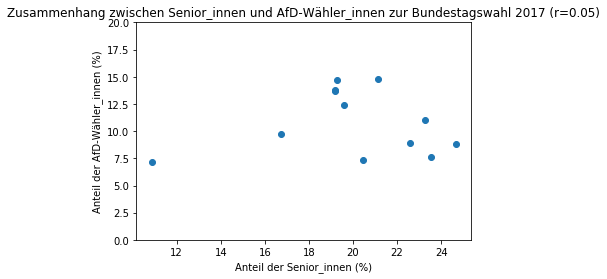

In [22]:
#Punktdiagramm anlegen
plt.scatter(dortmund['2017RelMenschenAb65']*100, dortmund['RelZweitstimmenAfD2017']*100) #Umrechnung in Prozent
#Titel des Diagramms und Beschriftung der Achsen
plt.xlabel('Anteil der Senior_innen (%)')
plt.ylabel('Anteil der AfD-Wähler_innen (%)')
plt.title('Zusammenhang zwischen Senior_innen und AfD-Wähler_innen zur Bundestagswahl 2017 (r=0.05)')
#Skalierung der y-Achse definieren
plt.ylim(bottom=0, top=20)
#Diagramm anzeigen
plt.show()

Auch in der Datenbetrachtung zum Jahr 2017 mit dem errechneten Korrelationskoeffizient von rund 0,05 wird deutlich, dass kein Zusammenhang zwischen den genannten Variablen besteht. Die Hypothese 2b kann auf Grundlage der Daten des Jahres 2017 ebenso nicht bestätigt werden.

# 3.4 Hypothese 2b - Wenn die Anzahl von Menschen im rentenfähigen Alter ab 65 Jahren in einem Bezirk zunimmt, verzeichnet die AfD mehr Zweitstimmen 

Statistische Hypothese 2b: Es besteht eine positive Korrelation (r) zwischen dem Anstieg der Einwohner_innen über 65 Jahren und dem Anstieg der AfD-Zweitstimmen

In [23]:
#Berechnen der Differenz des relativen Anteils von Menschen über 65 Jahren der Jahre 2013 und 2017
dortmund['EntwRentner1317'] = (dortmund['2017RelMenschenAb65']) - (dortmund['2013RelMenschenAb65']) 

#Berechnen der Korratation Entwicklung Anteil der Menschen ab 65 Jahren zu Entwicklung AfD-Zweitstimmen von 2013 zu 2017
KorrelationEntwRentnerAfD = dortmund['EntwRentner1317'].corr(dortmund['EntwWahlAfD1317'])
print(KorrelationEntwRentnerAfD)

0.1974760387341774


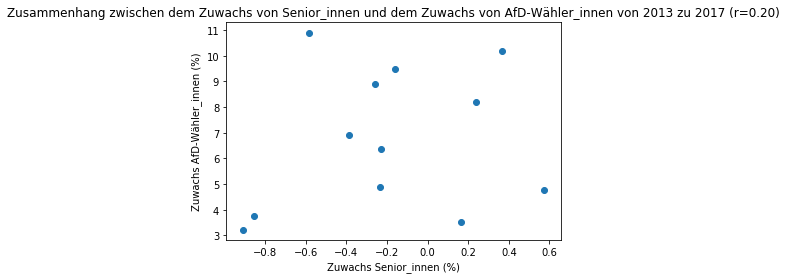

In [24]:
#Punktdiagramm anlegen
plt.scatter(dortmund['EntwRentner1317']*100, dortmund['EntwWahlAfD1317']*100) #Umrechnung in Prozent
#Titel des Diagramms und Beschriftung der Achsen
plt.xlabel('Zuwachs Senior_innen (%)')
plt.ylabel('Zuwachs AfD-Wähler_innen (%)')
plt.title('Zusammenhang zwischen dem Zuwachs von Senior_innen und dem Zuwachs von AfD-Wähler_innen von 2013 zu 2017 (r=0.20)')
#Diagramm anzeigen
plt.show()


In [25]:
#Dataframe zur Betrachtung rückläufiger Senior_innenzahlen
dortmundEntwAusl= dortmund [['Stadtbezirk', '2013RelMenschenAb65', '2017RelMenschenAb65', 'EntwRentner1317', 'RelZweitstimmenAfD2013', 'RelZweitstimmenAfD2017', 'EntwWahlAfD1317']]
#Anzeige aktualisierter Datensatz
dortmundEntwAusl.head(n=12)


,Stadtbezirk,2013RelMenschenAb65,2017RelMenschenAb65,EntwRentner1317,RelZweitstimmenAfD2013,RelZweitstimmenAfD2017,EntwWahlAfD1317
0,Innenstadt-West,0.169476,0.167189,-0.002287,0.033811,0.097321,0.063510
1,Innenstadt-Nord,0.117744,0.108660,-0.009084,0.039537,0.071785,0.032248
2,Innenstadt-Ost,0.213083,0.204529,-0.008555,0.035910,0.073641,0.037731
3,Eving,0.194263,0.191666,-0.002597,0.047836,0.136776,0.088941
4,Scharnhorst,0.217127,0.211270,-0.005857,0.038634,0.147652,0.109018
5,Brackel,0.236576,0.232681,-0.003895,0.041482,0.110661,0.069179
6,Aplerbeck,0.240829,0.246560,0.005731,0.040065,0.087947,0.047883
7,Hörde,0.228419,0.226053,-0.002366,0.040184,0.088885,0.048701
8,Hombruch,0.233639,0.235286,0.001647,0.041087,0.076260,0.035173
9,Lütgendortmund,0.193377,0.195762,0.002385,0.041748,0.123856,0.082108


Der Korrelationskoeffizient beträgt rund 0,20. Das bedeutet, es besteht kein Zusammenhang zwischen der Entwicklung der Anzahl von Senior_innen und AfD-Zweitstimmen. Die Hypothese 2b kann nicht bestätigt werden.

# 3.5 Betrachtung weiterer Altersgruppen

Um eine Aussage zu den Zusammenhängen der Altersstruktur und der AfD-Wählerquote in den Dortmunder Stadtbezirken treffen zu können, ist es notwendig auch die weiteren Altersgruppen zu betrachten. 

Es wurde sich dabei an der vorliegenden Einteilung der Altersabschnitte aus dem zur Verfügung gestellten Datensätzen der Stadt Dortmund orientiert:<br>
18 bis 24,<br>
25 bis 34,<br>
35 bis 49 und<br>
50 bis 64 Jährige.

### 3.5.1 Betrachtung der Wähler_innengruppen unter 65 Jahren im Zusammenhang mit den AfD-Wahlergebnissen von 2013 (zu Hypothese 2a)

In [26]:
#Funktion mit Rückgabewert (return), damit in weiterem Code damit gearbeitet werden kann 
#a ist Anzahl Menschen Alter x in Jahr y, b ist Einwohnerzahl gesamt in Jahr y, c ist Relative AfD-Zweitstimmen in Jahr y
def korrelationskoeffizient (a, b, c):
    relAlter = a / b
    ergebnisKorr = relAlter.corr(c)                                  
    return(round(ergebnisKorr,2))

#Anwendung der Funktion für alle Altersabschnitte
ergebnis18bis24in2013 = korrelationskoeffizient(dortmund['2013Alter18bis24'],dortmund['EinwohnerGesamt2013'], dortmund['RelZweitstimmenAfD2013'])
print("Der Korrelationskoeffizient für die 18 bis 24 jährigen Dormunder in 2013 ist " + str(ergebnis18bis24in2013))
ergebnis25bis34in2013 = korrelationskoeffizient(dortmund['2013Alter25bis34'],dortmund['EinwohnerGesamt2013'], dortmund['RelZweitstimmenAfD2013'])
print("Der Korrelationskoeffizient für die 25 bis 34 jährigen Dormunder in 2013 ist " + str(ergebnis25bis34in2013))
ergebnis35bis49in2013 = korrelationskoeffizient(dortmund['2013Alter35bis49'],dortmund['EinwohnerGesamt2013'], dortmund['RelZweitstimmenAfD2013'])
print("Der Korrelationskoeffizient für die 35 bis 49 jährigen Dormunder in 2013 ist " + str(ergebnis35bis49in2013))
ergebnis50bis64in2013 = korrelationskoeffizient(dortmund['2013Alter50bis64'],dortmund['EinwohnerGesamt2013'], dortmund['RelZweitstimmenAfD2013'])
print("Der Korrelationskoeffizient für die 50 bis 64 jährigen Dormunder in 2013 ist " + str(ergebnis50bis64in2013))


Der Korrelationskoeffizient für die 18 bis 24 jährigen Dormunder in 2013 ist -0.14
Der Korrelationskoeffizient für die 25 bis 34 jährigen Dormunder in 2013 ist -0.64
Der Korrelationskoeffizient für die 35 bis 49 jährigen Dormunder in 2013 ist 0.16
Der Korrelationskoeffizient für die 50 bis 64 jährigen Dormunder in 2013 ist 0.38


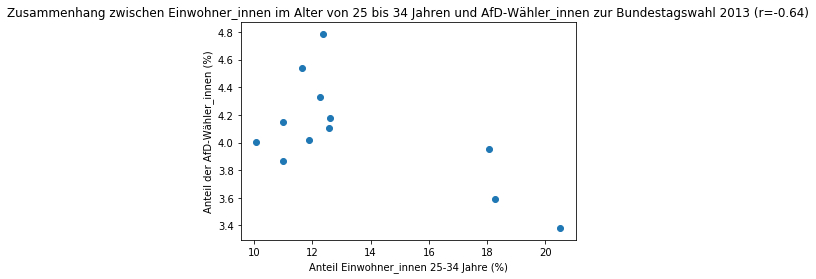

In [27]:
#Punktdiagramm anlegen
plt.scatter(dortmund['2013Alter25bis34']/dortmund['EinwohnerGesamt2013']*100, dortmund['RelZweitstimmenAfD2013']*100) #Umrechnung in Prozent
#Titel des Diagramms und Beschriftung der Achsen
plt.xlabel('Anteil Einwohner_innen 25-34 Jahre (%)')
plt.ylabel('Anteil der AfD-Wähler_innen (%)')
plt.title('Zusammenhang zwischen Einwohner_innen im Alter von 25 bis 34 Jahren und AfD-Wähler_innen zur Bundestagswahl 2013 (r=-0.64)')
#Skalierung der y-Achse definieren
#plt.ylim(bottom=0, top=6)
#Diagramm anzeigen
plt.show()


Zusammenhänge 2013:

18-24 Jährige: kein

25-34 Jährige: bemerkenswert
Der Korrelationskoeffizient ist negativ. Das bedeutet je mehr 25 bis 34 Jährige in den Stadtteilen wohnen, desto weniger Zweitstimmen erhält die AfD.

35-49 Jährige: kein

50-64 Jährige: bemerkenswert
Der Korrelationskoeffizient ist positiv. Das bedeutet je mehr 50 bis 64 Jährige in den Stadtteilen wohnen, desto mehr Zweitstimmen erhält die AfD.

### 3.5.2 Betrachtung der Wähler_innengruppen unter 65 Jahren im Zusammenhang mit den AfD-Wahlergebnissen von 2017 (zu Hypothese 2a)

In [28]:
#Funktion von oben für 2017 anwenden
ergebnis18bis24in2017 = korrelationskoeffizient(dortmund['2017Alter18bis24'],dortmund['EinwohnerGesamt2017'], dortmund['RelZweitstimmenAfD2017'])
print("Der Korrelationskoeffizient für die 18 bis 24 jährigen Dormunder in 2017 ist " + str(ergebnis18bis24in2017))
ergebnis25bis34in2017 = korrelationskoeffizient(dortmund['2017Alter25bis34'],dortmund['EinwohnerGesamt2017'], dortmund['RelZweitstimmenAfD2017'])
print("Der Korrelationskoeffizient für die 25 bis 34 jährigen Dormunder in 2017 ist " + str(ergebnis25bis34in2017))
ergebnis35bis49in2017 = korrelationskoeffizient(dortmund['2017Alter35bis49'],dortmund['EinwohnerGesamt2017'], dortmund['RelZweitstimmenAfD2017'])
print("Der Korrelationskoeffizient für die 35 bis 49 jährigen Dormunder in 2017 ist " + str(ergebnis35bis49in2017))
ergebnis50bis64in2017 = korrelationskoeffizient(dortmund['2017Alter50bis64'],dortmund['EinwohnerGesamt2017'], dortmund['RelZweitstimmenAfD2017'])
print("Der Korrelationskoeffizient für die 50 bis 64 jährigen Dormunder in 2017 ist " + str(ergebnis50bis64in2017))


Der Korrelationskoeffizient für die 18 bis 24 jährigen Dormunder in 2017 ist -0.25
Der Korrelationskoeffizient für die 25 bis 34 jährigen Dormunder in 2017 ist -0.45
Der Korrelationskoeffizient für die 35 bis 49 jährigen Dormunder in 2017 ist -0.18
Der Korrelationskoeffizient für die 50 bis 64 jährigen Dormunder in 2017 ist 0.39


Zusammenhänge 2017:

18-24 Jährige: gering
Der Korrelationskoeffizient ist negativ. Das bedeutet je mehr 18 bis 24 Jährige in den Stadtteilen wohnen, desto weniger Zweitstimmen erhält die AfD.

25-34 Jährige: bemerkenswert
Der Korrelationskoeffizient ist negativ. Das bedeutet je mehr 25 bis 34 Jährige in den Stadtteilen wohnen, desto weniger Zweitstimmen erhält die AfD.

35-49 Jährige: kein

50-64 Jährige: bemerkenswert
Der Korrelationskoeffizient ist positiv. Das bedeutet je mehr 50 bis 64 Jährige in den Stadtteilen wohnen, desto mehr Zweitstimmen erhält die AfD.

<b>FRAGE AN TOBIAS: Berechnung von r an allen Stellen richtig? Vermeitlich aussagekräftige Zahlen!?<b>

### 3.5.3 Betrachtung der Entwicklung aller Wähler_innen zwischen den Jahren 2013 und 2017 und des Zusammenhangs  mit der Wahlstimmenentwicklung der AfD in diesem Zeitraum (zu Hypothese 2b)

In [29]:
#Berechnung relativer Werte aller Altersgruppen der Jahre 2013 und 2017
dortmund['2013RelMenschen18bis24'] = dortmund ['2013Alter18bis24'] / dortmund['EinwohnerGesamt2013']
dortmund['2017RelMenschen18bis24'] = dortmund ['2017Alter18bis24'] / dortmund['EinwohnerGesamt2017']
dortmund['2013RelMenschen25bis34'] = dortmund ['2013Alter25bis34'] / dortmund['EinwohnerGesamt2013']
dortmund['2017RelMenschen25bis34'] = dortmund ['2017Alter25bis34'] / dortmund['EinwohnerGesamt2017']
dortmund['2013RelMenschen35bis49'] = dortmund ['2013Alter35bis49'] / dortmund['EinwohnerGesamt2013']
dortmund['2017RelMenschen35bis49'] = dortmund ['2017Alter35bis49'] / dortmund['EinwohnerGesamt2017']
dortmund['2013RelMenschen50bis64'] = dortmund ['2013Alter50bis64'] / dortmund['EinwohnerGesamt2013']
dortmund['2017RelMenschen50bis64'] = dortmund ['2017Alter50bis64'] / dortmund['EinwohnerGesamt2017']

#Funktion erstellen mit Rückgabewert, bestehend aus folgendenSchritten:
#Berechnen der Differenz des relativen Anteils von Menschen des Alters x 2013 und 2017
#Korratation Entwicklung Anteil der Menschen des Alters x zu Entwicklung AfD-Zweitstimmen von 2013 zu 2017
#d ist die relative Zah der Menschen eines Alters x in 2017, e ist die relative Zah der Menschen eines Alters x in 2013,
#f ist Entwicklung AfD-Zweitstimmen von 2013 zu 2017

def korrelationskoeffizientEntw (d, e, f):
    entwRelAlter = d - e
    ergebnisKorr = entwRelAlter.corr(f)                                  
    return(round(ergebnisKorr,2))
 
ergebnisEntw18bis24 = korrelationskoeffizientEntw(dortmund['2017RelMenschen18bis24'],dortmund['2013RelMenschen18bis24'], dortmund['EntwWahlAfD1317'])
print("Der Korrelationskoeffizient für die Entwicklung der 18 bis 24 jährigen Dormunder und den AfD-Zweitstimmen in den Jahren 2013 zu 2017 ist " + str(ergebnisEntw18bis24))
ergebnisEntw25bis34 = korrelationskoeffizientEntw(dortmund['2017RelMenschen25bis34'],dortmund['2013RelMenschen25bis34'], dortmund['EntwWahlAfD1317'])
print("Der Korrelationskoeffizient für die Entwicklung der 25 bis 34 jährigen Dormunder und den AfD-Zweitstimmen in den Jahren 2013 zu 2017 ist " + str(ergebnisEntw25bis34))
ergebnisEntw35bis49 = korrelationskoeffizientEntw(dortmund['2017RelMenschen35bis49'],dortmund['2013RelMenschen35bis49'], dortmund['EntwWahlAfD1317'])
print("Der Korrelationskoeffizient für die Entwicklung der 35 bis 49 jährigen Dormunder und den AfD-Zweitstimmen in den Jahren 2013 zu 2017 ist " + str(ergebnisEntw35bis49))
ergebnisEntw50bis64 = korrelationskoeffizientEntw(dortmund['2017RelMenschen50bis64'],dortmund['2013RelMenschen50bis64'], dortmund['EntwWahlAfD1317'])
print("Der Korrelationskoeffizient für die Entwicklung der 50 bis 64 jährigen Dormunder und den AfD-Zweitstimmen in den Jahren 2013 zu 2017 ist " + str(ergebnisEntw50bis64))


Der Korrelationskoeffizient für die Entwicklung der 18 bis 24 jährigen Dormunder und den AfD-Zweitstimmen in den Jahren 2013 zu 2017 ist -0.48
Der Korrelationskoeffizient für die Entwicklung der 25 bis 34 jährigen Dormunder und den AfD-Zweitstimmen in den Jahren 2013 zu 2017 ist 0.15
Der Korrelationskoeffizient für die Entwicklung der 35 bis 49 jährigen Dormunder und den AfD-Zweitstimmen in den Jahren 2013 zu 2017 ist -0.02
Der Korrelationskoeffizient für die Entwicklung der 50 bis 64 jährigen Dormunder und den AfD-Zweitstimmen in den Jahren 2013 zu 2017 ist -0.07


Zusammenhänge für die Entwicklung von 2013 zu 2017:

18-24 Jährige: bemerkenswert
Der Korrelationskoeffizient ist negativ. Das bedeutet je größer der Zuwachs an 18 bis 24 Jährigen in den Stadtteilen ist, desto weniger Zuwachs an Zweitstimmen verzeichnet die AfD.

25-34 Jährige: kein

35-49 Jährige: kein

50-64 Jährige: kein

<b>FRAGE AN TOBIAS: Macht es Sinn, die Entwicklung von 2013 zu 2017 in diesem Fall zu untersuchen?<b>

## 4 Ergebnisse

<b>FRAGE AN TOBIAS: Braucht man das in einem Jupyter Notebook?<b>

## Abbildungen für Bericht (wird später wieder entfernt)

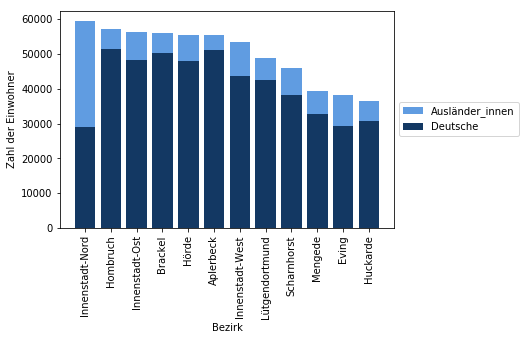

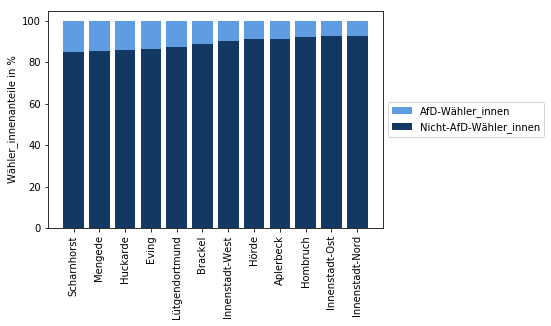

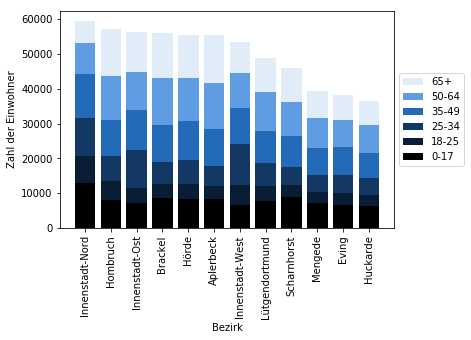

In [30]:
#Carts zu Vorüberlegungen ohne Titel


#Ausländer_innen und Deutsche

#Serien für aufeinandergestapelte Balken und deren Farben vorbereiten
serie1 = plt.bar(range(len(dortmund)), deutsch2017, color='#133863')
serie2 = plt.bar(range(len(dortmund)), ausländer2017, bottom=deutsch2017, color='#609CE1')  
#Beschriftung der Säulen auf der X-Achse einstellen
plt.xticks(range(len(dortmund)), dortmund.sort_values('EinwohnerGesamt2017',ascending=False)['Stadtbezirk'],rotation=90) 
#Beschriftung der Achsen
plt.xlabel('Bezirk') 
plt.ylabel('Zahl der Einwohner') 
#Fügt eine Legende rechts neben dem Diagramm hinzu.
plt.legend((serie2,serie1), ('Ausländer_innen','Deutsche'), loc='center left', bbox_to_anchor=(1, 0.5))
#Diagramm anzeigen
plt.show() 


#Wahlstimmen AfD

#Serien für aufeinandergestapelte Balken und deren Farben vorbereiten
serie1 = plt.bar(range(len(dortmund)), nichtAfDWähler2017, color='#133863')
serie2 = plt.bar(range(len(dortmund)), AfDWähler2017, bottom=nichtAfDWähler2017, color='#609CE1')  
#Beschriftung der Säulen auf der X-Achse einstellen
plt.xticks(range(len(dortmund)), dortmund.sort_values('RelZweitstimmenAfD2017',ascending=False)['Stadtbezirk'],rotation=90) 
#Beschriftung der Achsen
plt.ylabel('Wähler_innenanteile in %') 
#Fügt eine Legende rechts neben dem Diagramm hinzu
plt.legend((serie2,serie1), ('AfD-Wähler_innen','Nicht-AfD-Wähler_innen'), loc='center left', bbox_to_anchor=(1, 0.5))
#Diagramm anzeigen
plt.show() 

#Alter

#Serien für aufeinandergestapelte Balken und deren Farben vorbereiten
serie0 = plt.bar(range(len(dortmund)), alterbis17, color='black')
serie1 = plt.bar(range(len(dortmund)), alter18bis24, bottom=alterbis17, color='#091D34') 
serie2 = plt.bar(range(len(dortmund)), alter25bis34, bottom=alterbis17+alter18bis24, color='#133863') #legt den Balken für "mittlere" auf den Balken für "junge"
serie3 = plt.bar(range(len(dortmund)), alter35bis49, bottom=alterbis17+alter18bis24+alter25bis34, color='#236AB9') 
serie4 = plt.bar(range(len(dortmund)), alter50bis64, bottom=alterbis17+alter18bis24+alter25bis34+alter35bis49, color='#609CE1') 
serie5 = plt.bar(range(len(dortmund)), alter65plus, bottom=alterbis17+alter18bis24+alter25bis34+alter35bis49+alter50bis64, color='#E1ECF9') 
#Beschriftung der Säulen auf der X-Achse einstellen
plt.xticks(range(len(dortmund)), dortmund.sort_values('EinwohnerGesamt2017',ascending=False)['Stadtbezirk'],rotation=90) 
#Titel des Diagramms und Beschriftung der Achsen
plt.xlabel('Bezirk') 
plt.ylabel('Zahl der Einwohner') 
#Fügt eine Legende rechts neben dem Diagramm hinzu
plt.legend((serie5,serie4,serie3,serie2,serie1,serie0), ('65+','50-64','35-49','25-34','18-25','0-17'), loc='center left', bbox_to_anchor=(1, 0.5)) #Fügt eine Legende hinzu.
#Diagramm anzeigen
plt.show() 

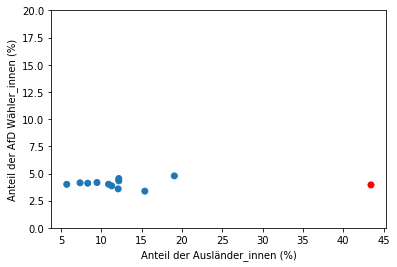

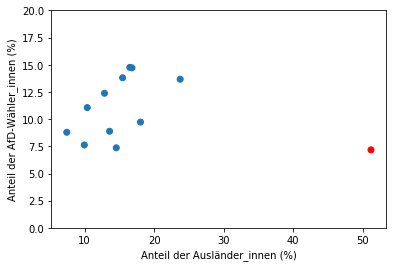

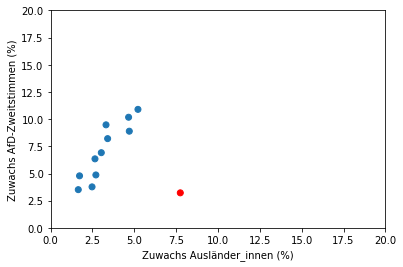

In [31]:
# zu Hypothesen

# 1a 2013

#Variablen zur Übersichtlichkeit definieren + Umrechnung in Prozent
x=dortmund['RelAusländer2013'] *100
y=dortmund['RelZweitstimmenAfD2013']*100 
# Für die farbliche Markierung des Ausreißers
col = np.where(x<40,'C0','r')
#Alternativ mit drei Farbfeldern:
#col = np.where(x<40,'k',np.where(y>4,'b','r'))
#Punktdiagramm anlegen
plt.scatter(x, y, c=col) 
#Titel des Diagramms und Beschriftung der Achsen
plt.xlabel('Anteil der Ausländer_innen (%)')
plt.ylabel('Anteil der AfD Wähler_innen (%)')
#Skalierung der y-Achse definieren
plt.ylim(bottom=0, top=20)
#Diagramm anzeigen
plt.show()


#1a 2017

# Für die farbliche Markierung des Ausreißers
col = np.where(dortmund['RelAusländer2017']*100<50,'C0','r')
#Punktdiagramm anlegen
plt.scatter(dortmund['RelAusländer2017']*100, dortmund['RelZweitstimmenAfD2017']*100, c=col) #Umrechnung in Prozent
#Titel des Diagramms und Beschriftung der Achsen
plt.xlabel('Anteil der Ausländer_innen (%)')
plt.ylabel('Anteil der AfD-Wähler_innen (%)')
#Skalierung der y-Achse definieren
plt.ylim(bottom=0, top=20)
#Diagramm anzeigen
plt.show()


#1b

# Für die farbliche Markierung des Ausreißers
col = np.where(dortmund['EntwAusländer1317']*100<7,'C0','r')
#Punktdiagramm anlegen
plt.scatter(dortmund['EntwAusländer1317']*100, dortmund['EntwWahlAfD1317']*100, c=col) #Umrechnung in Prozent
#Titel des Diagramms und Beschriftung der Achsen
plt.xlabel('Zuwachs Ausländer_innen (%)')
plt.ylabel('Zuwachs AfD-Zweitstimmen (%)')
plt.ylim(bottom=0, top=20)
plt.xlim(0, 20)
#Diagramm anzeigen
plt.show()

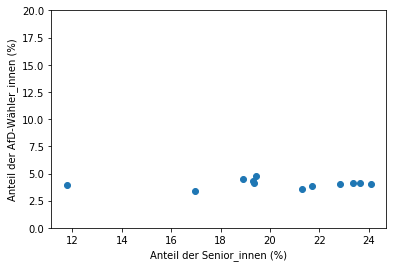

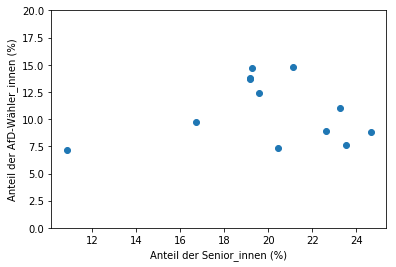

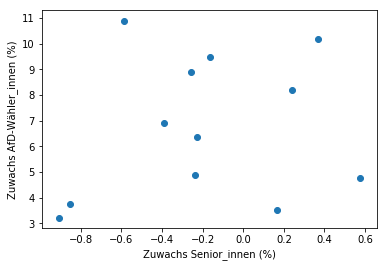

In [32]:
#zu Hypothesen

#2a 2013

#Punktdiagramm anlegen
plt.scatter(dortmund['2013RelMenschenAb65']*100, dortmund['RelZweitstimmenAfD2013']*100) #Umrechnung in Prozent
#Titel des Diagramms und Beschriftung der Achsen
plt.xlabel('Anteil der Senior_innen (%)')
plt.ylabel('Anteil der AfD-Wähler_innen (%)')
#Skalierung der y-Achse definieren
plt.ylim(bottom=0, top=20)
#Diagramm anzeigen
plt.show()

#2a 2017

#Punktdiagramm anlegen
plt.scatter(dortmund['2017RelMenschenAb65']*100, dortmund['RelZweitstimmenAfD2017']*100) #Umrechnung in Prozent
#Titel des Diagramms und Beschriftung der Achsen
plt.xlabel('Anteil der Senior_innen (%)')
plt.ylabel('Anteil der AfD-Wähler_innen (%)')
plt.ylim(bottom=0, top=20)
#Diagramm anzeigen
plt.show()

#2b

#Punktdiagramm anlegen
plt.scatter(dortmund['EntwRentner1317']*100, dortmund['EntwWahlAfD1317']*100) #Umrechnung in Prozent
#Titel des Diagramms und Beschriftung der Achsen
plt.xlabel('Zuwachs Senior_innen (%)')
plt.ylabel('Zuwachs AfD-Wähler_innen (%)')
plt.show()